In [9]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

전처리

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/Digital_Hana1/data/시도별 전출입 인구수.xlsx',
                   engine = 'openpyxl')
# NaN 값 채우기
df = df.fillna(method = 'ffill')
# 서울시(전출지)에서 다른 지역(전입지)으로 이동한 인구 데이터
# 불 인덱스(True)를 데이터 추출
b_ind = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[b_ind]
# 전출지별 열 삭제
df_seoul = df_seoul.drop('전출지별', axis = 1)
# 열 이름 변경
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis = 1)
# 행 인덱스 변경
df_seoul = df_seoul.set_index('전입지')

In [3]:
df_ggd = df_seoul.loc['경기도']
df_ggd.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

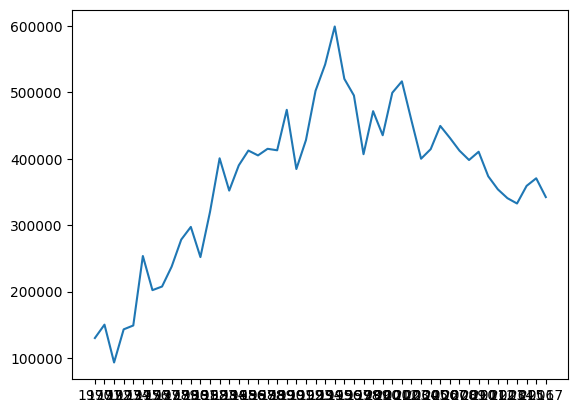

In [4]:
plt.plot(df_ggd.index,df_ggd.values)
plt.show()

#시각화 도구
- <참고> 파이썬 그래프 갤러리 https://www.python-graph-gallery.com/
- matplotlib <br>
- seaborn

##matplotlib

###화면분할

<ipython-input-13-57419063283b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_ggd.index, rotation = 75)
<ipython-input-13-57419063283b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_ggd.index, rotation = 75)


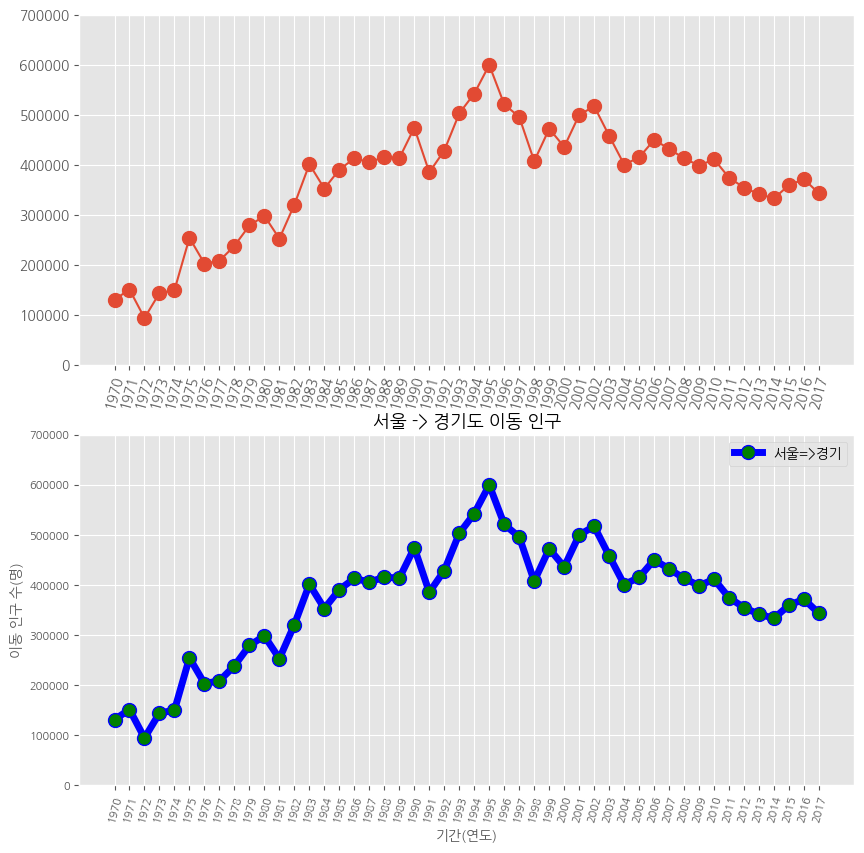

In [13]:
#스타일 서식
plt.style.use('ggplot')

#한글 폰트 지정
plt.rc('font',family = 'NanumGothic')

#그래프 객체 생성
fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(2,1,1) #행의 개수, 열의 개수, 위치
ax2 = fig.add_subplot(2,1,2)

#axe 객체에 그래프 출력
ax1.plot(df_ggd, marker = 'o', markersize = 10)
ax2.plot(df_ggd, marker = 'o', markersize = 10, markerfacecolor='green',color='blue',linewidth=5, label='서울=>경기')

#축 범위 변경
ax1.set_ylim(0,700000)
ax2.set_ylim(0,700000)

#축 라벨 회전
ax1.set_xticklabels(df_ggd.index, rotation = 75)
ax2.set_xticklabels(df_ggd.index, rotation = 75)

#제목 추가하기
#차트 제목 추가
ax2.set_title('서울 -> 경기도 이동 인구',size=13)
#축 제목 추가
ax2.set_xlabel('기간(연도)',size=10)
ax2.set_ylabel('이동 인구 수(명)',size=10)

#x축 라벨 크기 변경
ax2.tick_params(axis='x',labelsize=8)
ax2.tick_params(axis='y',labelsize=8)

#범례추가
ax2.legend(loc='best')
plt.show()

###색상 & 헥사 코드

In [15]:
import matplotlib

colors = {}

for i,j in matplotlib.colors.cnames.items():
  colors[i]=j

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

###면적 그래프

In [17]:
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도']]
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [19]:
#행과 열 전환
df_4_t=df_4.T

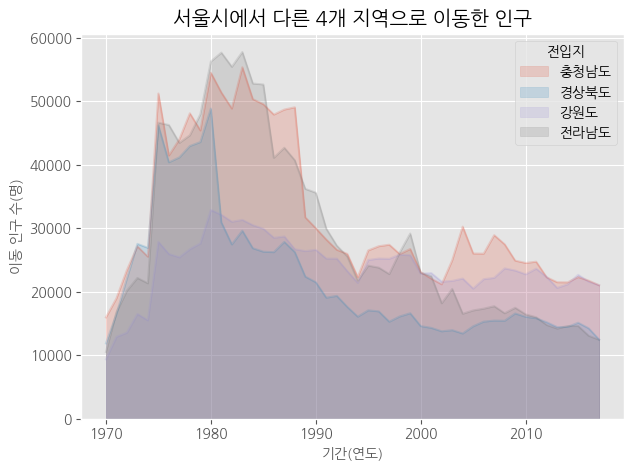

In [25]:
#kind 매개변수
df_4_t.plot(kind='area',
            stacked=False,   #누적 여부
            alpha = 0.2,
            figsize = (7,5))

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구')
#축 제목
plt.xlabel('기간(연도)',size=10)
plt.ylabel('이동 인구 수(명)',size=10)

plt.show()

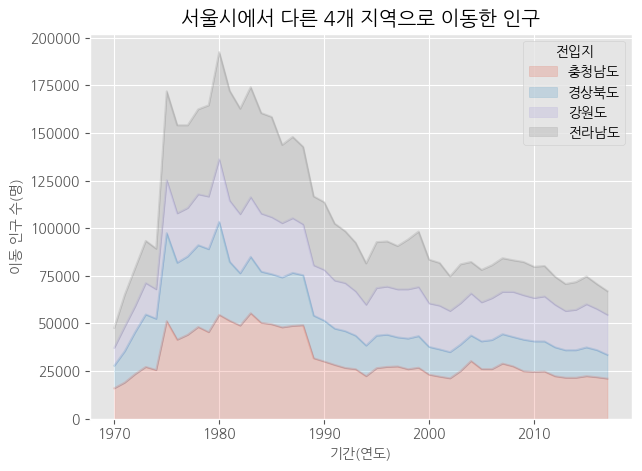

In [26]:
#누적 면적 그래프
df_4_t.plot(kind='area',
            stacked=True,   #누적 여부
            alpha = 0.2,
            figsize = (7,5))

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구')
#축 제목
plt.xlabel('기간(연도)',size=10)
plt.ylabel('이동 인구 수(명)',size=10)

plt.show()

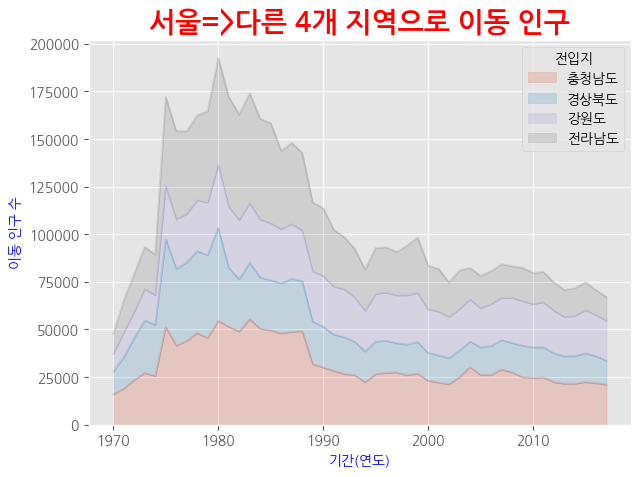

In [31]:
#axe객체로 그리기

#스타일 서식 적용
plt.style.use('ggplot')

#객체 생성
ax1 = df_4_t.plot(kind='area',
                  stacked=True,   #누적 여부
                  alpha = 0.2,
                  figsize = (7,5))

#차트 제목
ax1.set_title('서울=>다른 4개 지역으로 이동 인구',size=20,
              color='red',weight = 'bold')

#축 제목
ax1.set_xlabel('기간(연도)',size=10,color='blue')
ax1.set_ylabel('이동 인구 수',size=10,color='blue')

plt.show()

###막대 그래프

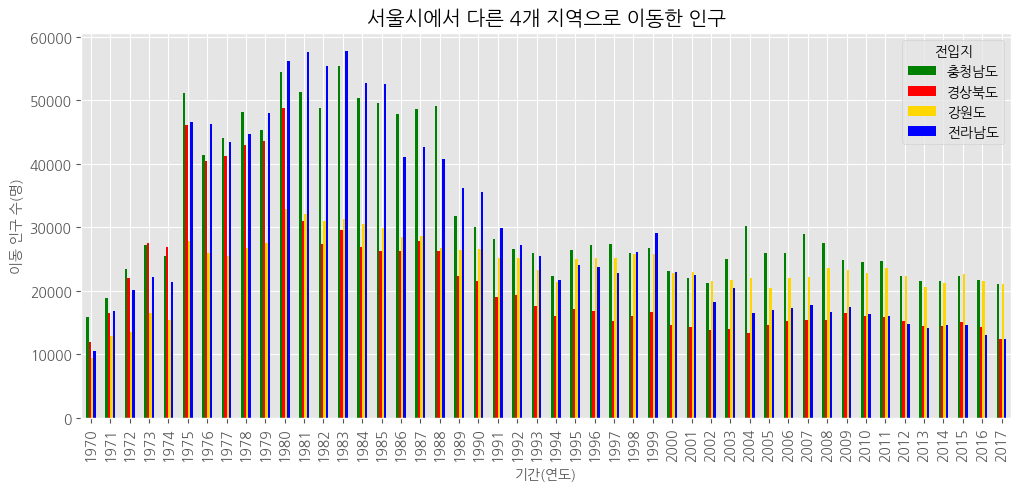

In [37]:
#스타일 서식 적용
plt.style.use('ggplot')

#수직 막대 그래프
df_4_t.plot(kind='bar',
          figsize=(12,5),
          width=0.5,
          color =['green','red','gold','blue'])

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구')
#축 제목
plt.xlabel('기간(연도)',size=10)
plt.ylabel('이동 인구 수(명)',size=10)

plt.show()

In [40]:
#2000년 이후 데이터 추출
df_4_new=df_4.loc[:,'2000':].T

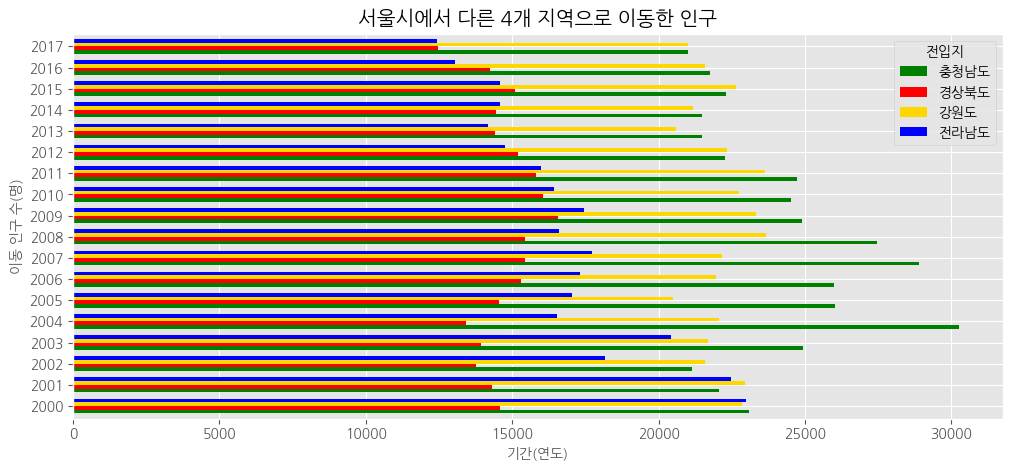

In [43]:
#스타일 서식 적용
plt.style.use('ggplot')

#수평 막대 그래프
df_4_new.plot(kind='barh',
          figsize=(12,5),
          width=0.7,
          color =['green','red','gold','blue'])

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구')
#축 제목
plt.xlabel('기간(연도)',size=10)
plt.ylabel('이동 인구 수(명)',size=10)

plt.show()

In [53]:
#인구의 총합 데이터
df_total=df_4_new.T
df_total['합계']=df_4_new.sum()
df_total

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,
충청남도,23083,22056,21155,24942,30246,26012,25986,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020,434258
경상북도,14576,14303,13762,13938,13414,14550,15285,15448,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464,265010
강원도,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016,398481
전라남도,22969,22457,18179,20432,16529,17049,17329,17717,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426,302765


In [54]:
#인구 합계 내림차순 정렬
df_total_dsc = df_total[['합계']].sort_values(by='합계',ascending=False)
df_total_dsc

,합계
전입지,
충청남도,434258
강원도,398481
전라남도,302765
경상북도,265010


barh - 수평 막대 그래프

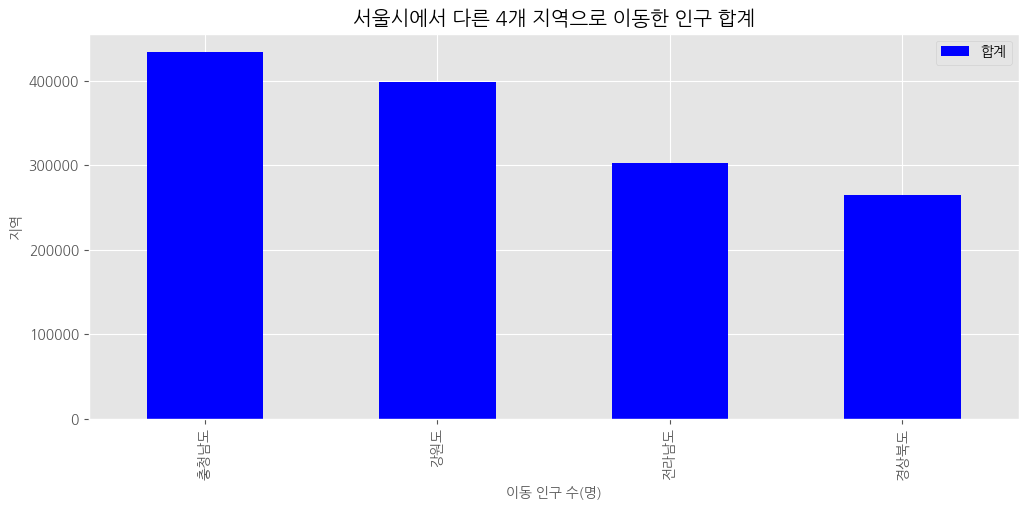

In [57]:
#스타일 서식 적용
plt.style.use('ggplot')

#수평 막대 그래프 - 축 전환으로 정렬 순서 바뀜
df_total_dsc.plot(kind='barh',  #인구 합계가 적은 지역부터 그려짐
              figsize=(12,5),
              width=0.5,
              color = 'blue')

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구 합계')
#축 제목
plt.xlabel('이동 인구 수(명)',size=10)
plt.ylabel('지역',size=10)

plt.show()

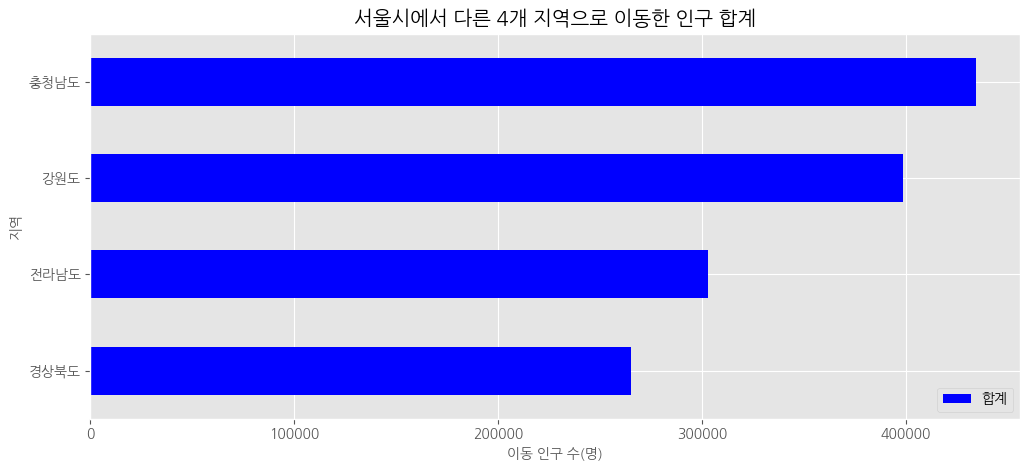

In [59]:
#인구 합계 오름차순 정렬
df_total_asc = df_total[['합계']].sort_values(by='합계',ascending=True) #ascending 생략 가능 기본값이 True
df_total_asc

#스타일 서식 적용
plt.style.use('ggplot')

#수평 막대 그래프 - 축 전환으로 정렬 순서 바뀜
df_total_asc.plot(kind='barh',  #인구 합계가 많은 지역부터 그려짐
              figsize=(12,5),
              width=0.5,
              color = 'blue')

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구 합계')
#축 제목
plt.xlabel('이동 인구 수(명)',size=10)
plt.ylabel('지역',size=10)

plt.show()

bar - 수직 막대 그래프

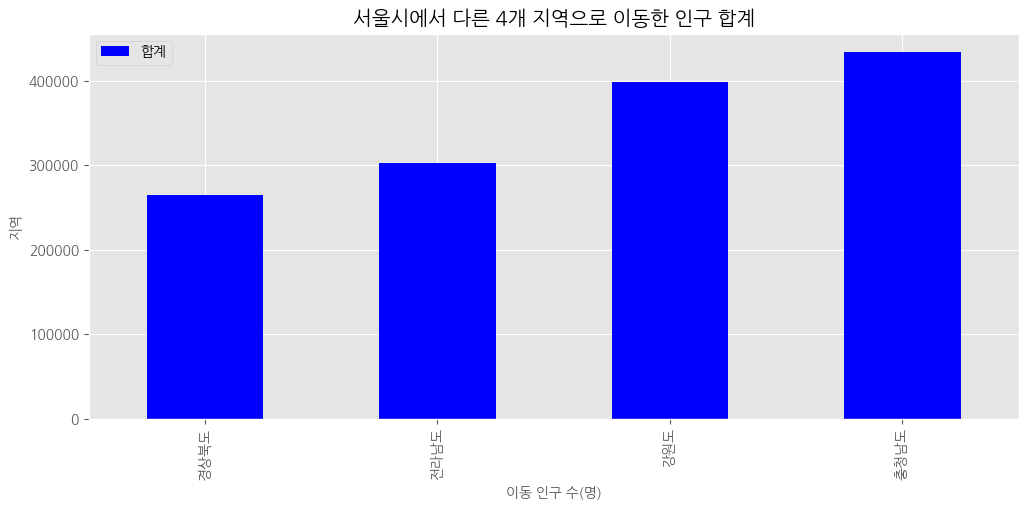

In [60]:
#수직 막대 그래프 
df_total_asc.plot(kind='bar',  #인구 합계가 적은 지역부터 그려짐
              figsize=(12,5),
              width=0.5,
              color = 'blue')

#차트 제목
plt.title('서울시에서 다른 4개 지역으로 이동한 인구 합계')
#축 제목
plt.xlabel('이동 인구 수(명)',size=10)
plt.ylabel('지역',size=10)

plt.show()

####보조축 (2축 그래프)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/Digital_Hana1/data/남북한발전전력량.xlsx',engine='openpyxl')

In [63]:
#북한 데이터 추출
df_north = df.iloc[5:]

In [67]:
df_north = df_north.drop('전력량 (억㎾h)',axis=1)

In [70]:
df_north = df_north.set_index('발전 전력별')

In [71]:
df_north_t= df_north.T

In [77]:
#전력 증감율 계산
df_north_t=df_north_t.rename(columns={'합계':'총발전량'})

In [79]:
df_north_t['전년총발전량'] = df_north_t['총발전량'].shift(1)
df_north_t

발전 전력별,총발전량,수력,화력,원자력,전년총발전량
1990,277,156,121,-,None
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [80]:
#증감율 = {(금년총발전량 - 전년총발전량) / 전년 총 발전량}*100
#총발전량 = 금년 총발전량
df_north_t['증감율'] = ((df_north_t['총발전량']-df_north_t['전년총발전량'])/df_north_t['전년총발전량'])*100

df_north_t

발전 전력별,총발전량,수력,화력,원자력,전년총발전량,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


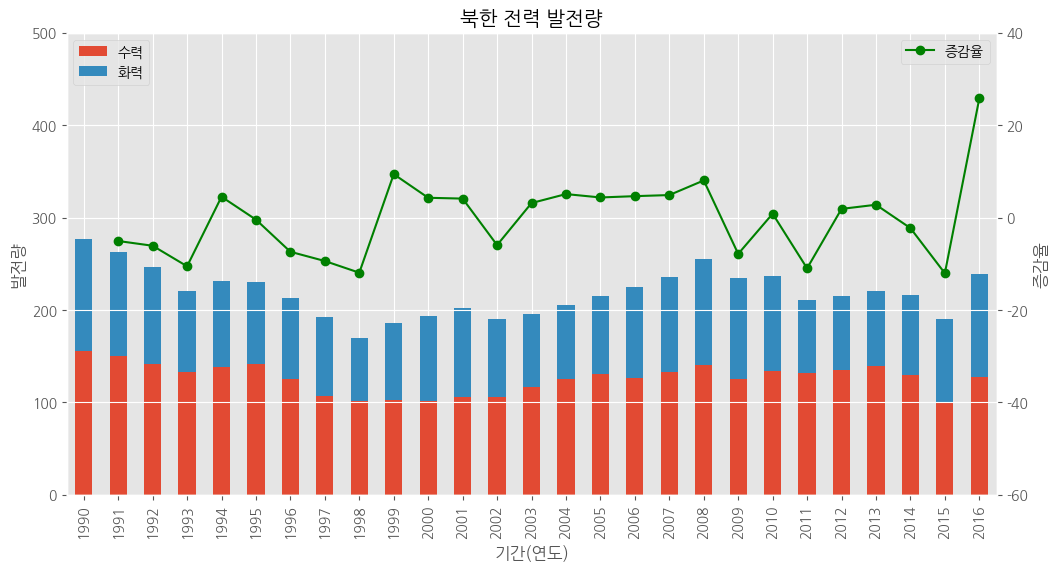

In [85]:
#한글 폰트 지정
plt.rc('font',family = 'NanumGothic')

#스타일 서식
plt.style.use('ggplot')

#마이너스 기호 출력
plt.rcParams['axes.unicode_minus'] = False

#axe객체 생성
#수력, 화력 발전에 대한 누적 막대 그래프
ax1 = df_north_t[['수력','화력']].plot(kind='bar', stacked=True, figsize=(12,6))
ax2 = ax1.twinx() # x축 공유
#증감율에 대한 선 그래프
ax2.plot(df_north_t.index,df_north_t['증감율'],color='green',marker='o',label='증감율')

#y축 범위 조정
ax1.set_ylim(0,500)
ax2.set_ylim(-60,40)

#차트 제목
ax1.set_title('북한 전력 발전량')

#축 이름
ax1.set_xlabel('기간(연도)')
ax1.set_ylabel('발전량')
ax2.set_ylabel('증감율')

#범례
ax1.legend(loc='upper left')
ax2.legend(loc='best')
plt.show()

###히스토그램

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('/content/drive/MyDrive/Digital_Hana1/data/auto-mpg.csv',header = None) #header = None : 열 이름 없음

In [88]:
#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model_year', 'origin', 'car_name']

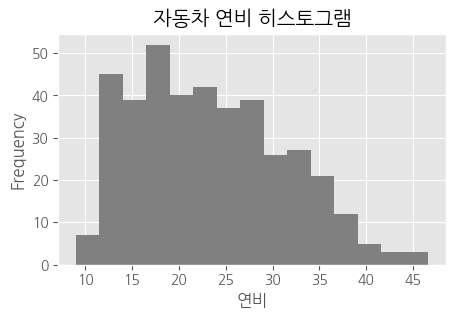

In [92]:
#한글 폰트 설정
plt.rc('font', family='NanumGothic')
#스타일서식
plt.style.use('ggplot')
#히스토그램
df['mpg'].plot(kind='hist',
               bins=15, #구간 수
               color = 'grey',
               figsize = (5,3)) 

#축 제목 
plt.title('자동차 연비 히스토그램')
plt.xlabel('연비')

plt.show()

###산점도

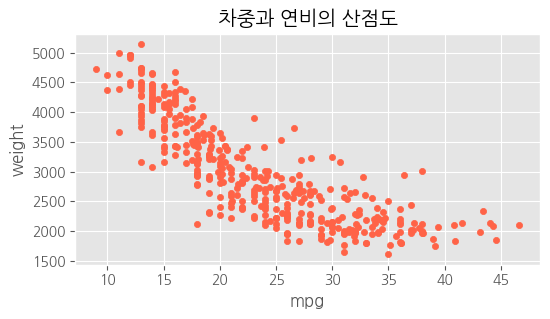

In [95]:
#스타일 서식
plt.style.use('ggplot')

#산점도
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c='tomato',  #color
        s=20,   #size
        figsize=(6,3))

#차트 제목
plt.title('차중과 연비의 산점도')

plt.show()

####버블차트

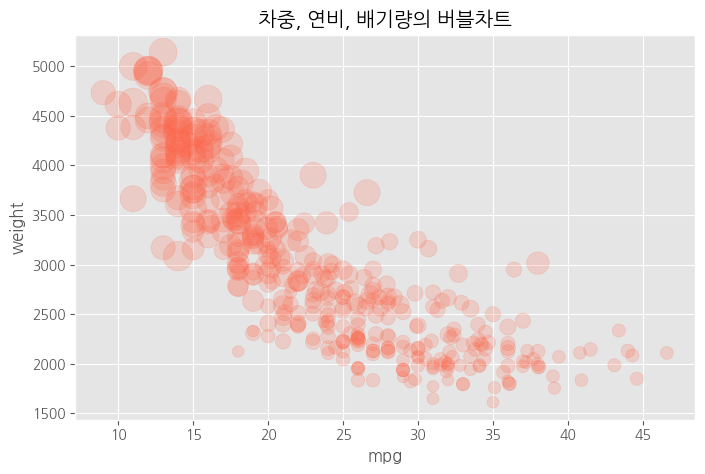

In [100]:
#버블차트
#스타일 서식
plt.style.use('ggplot')

#버블차트
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c='tomato',  #color
        s='displacement',    #size
        alpha = 0.2,
        figsize=(8,5))

#차트 제목
plt.title('차중, 연비, 배기량의 버블차트')

plt.show()

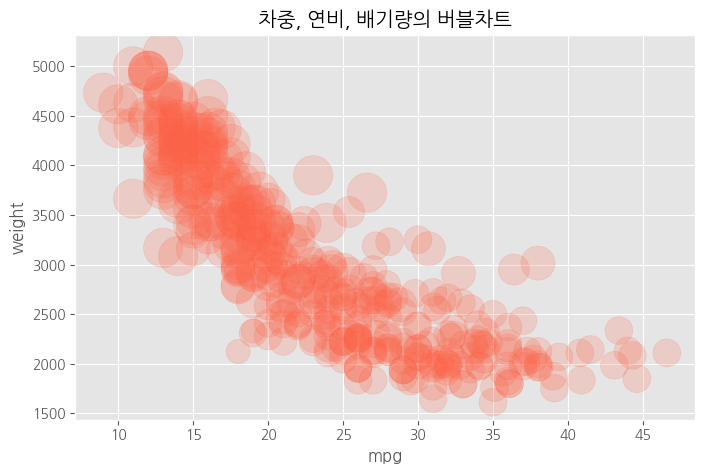

In [101]:
#변동성이 적은 데이터의 버블차트
cy = df.cylinders * 100
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c='tomato',  #color
        s=cy,    #size
        alpha = 0.2,
        figsize=(8,5))

#차트 제목
plt.title('차중, 연비, 실린더의 버블차트')

plt.show()

####색상으로 산점도 그리기

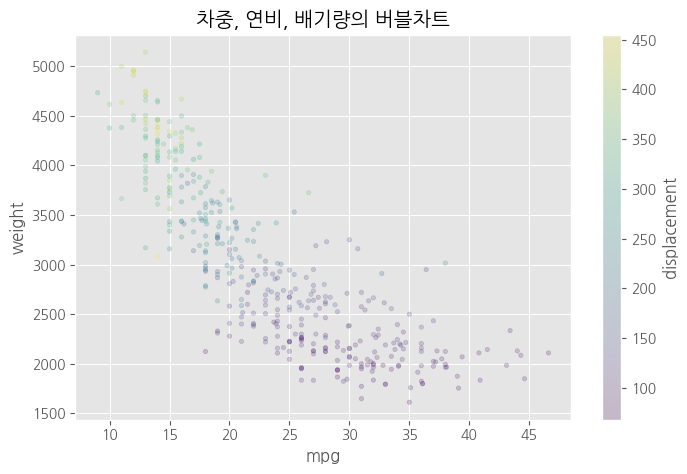

In [102]:
#원의 색상으로 그리기
#스타일 서식
plt.style.use('ggplot')

#버블차트
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c='displacement',  #color
        s=10,    #size
        alpha = 0.2,
        figsize=(8,5))

#차트 제목
plt.title('차중, 연비, 배기량의 버블차트')

plt.show()

In [140]:
#컬러맵 확인하기
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

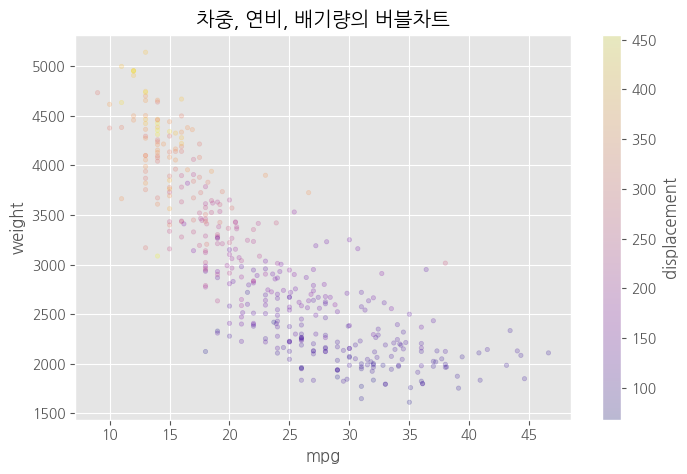

In [108]:
#원의 색상으로 그리기 (색상 지정)
#스타일 서식
plt.style.use('ggplot')

#버블차트
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c='displacement',  #color
        cmap = 'plasma',
        s=10,    #size
        alpha = 0.2,
        figsize=(8,5))

#차트 제목
plt.title('차중, 연비, 배기량의 버블차트')

plt.show()

In [109]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


####범주형 변수 산점도

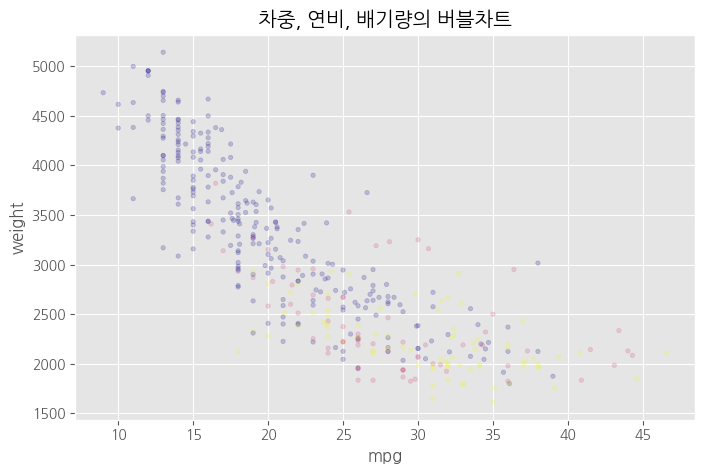

In [112]:
#원의 색상으로 그리기 (색상 지정)
#스타일 서식
plt.style.use('ggplot')

#origin 전처리
origin_cat = df.origin.astype('category') #요소의 타입 변경

#버블차트
df.plot(kind='scatter',
        x='mpg',
        y='weight',
        c=origin_cat,  #color
        cmap = 'plasma',
        s=10,    #size
        alpha = 0.2,
        figsize=(8,5))

#차트 제목
plt.title('차중, 연비, 배기량의 버블차트')

plt.show()

###파이차트 (원그래프)

In [113]:
df['count']=1
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [116]:
df_origin = df.groupby('origin').sum()

<ipython-input-116-b920aa8559be>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()


In [119]:
df_origin.index=['USA','EU','JAP']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model_year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAP,2405.6,324,8114.0,175477.0,1277.6,6118,79


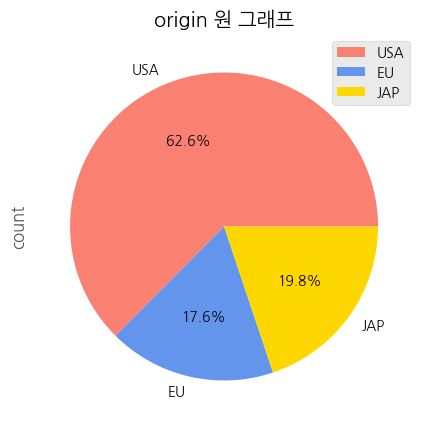

In [128]:
#파이 차트

#스타일 서식
plt.style.use('ggplot')

df_origin['count'].plot(kind='pie',
                        figsize=(10,5),
                        autopct = '%.1f%%',
                        colors = ['salmon','cornflowerblue','gold'],
                        startangle=0)

#차트 제목 추가
plt.title('origin 원 그래프')

#범례

plt.legend(loc='best')

plt.show()

###박스 플랏

In [136]:
#origin 별로 연비 데이터 만들기
mpg_1=df[df['origin']==1]['mpg']
mpg_2=df[df['origin']==2]['mpg']
mpg_3=df[df['origin']==3]['mpg']

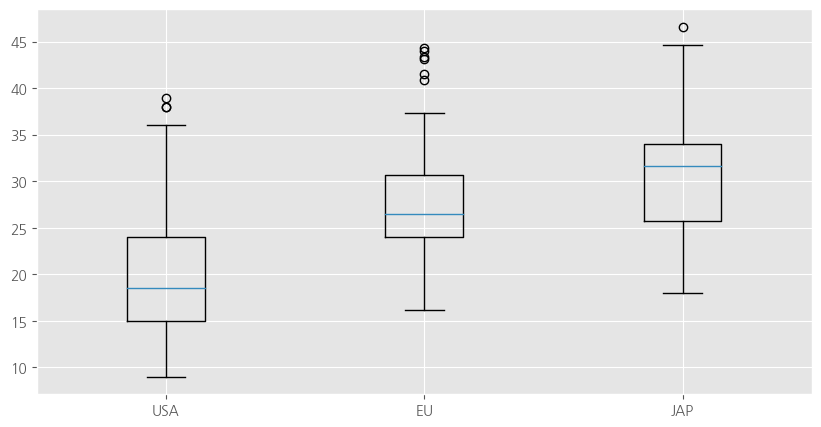

In [137]:
#그림 객체
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#수직 상자 그림
ax.boxplot(x=[mpg_1,mpg_2,mpg_3],
           labels = ['USA','EU','JAP'])
plt.show()

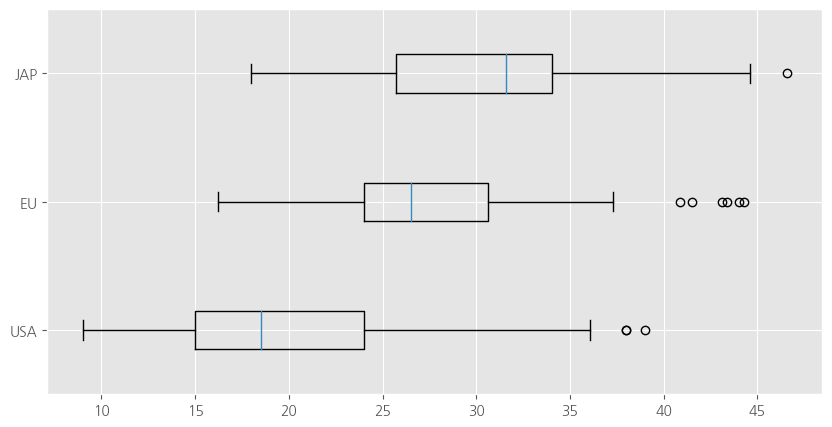

In [139]:
#그림 객체
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#수평 상자 그림
ax.boxplot(x=[mpg_1,mpg_2,mpg_3],
           labels = ['USA','EU','JAP'],
           vert = False)
plt.show()

##seaborn

In [162]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import seaborn as sns

titanic=sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


###산점도

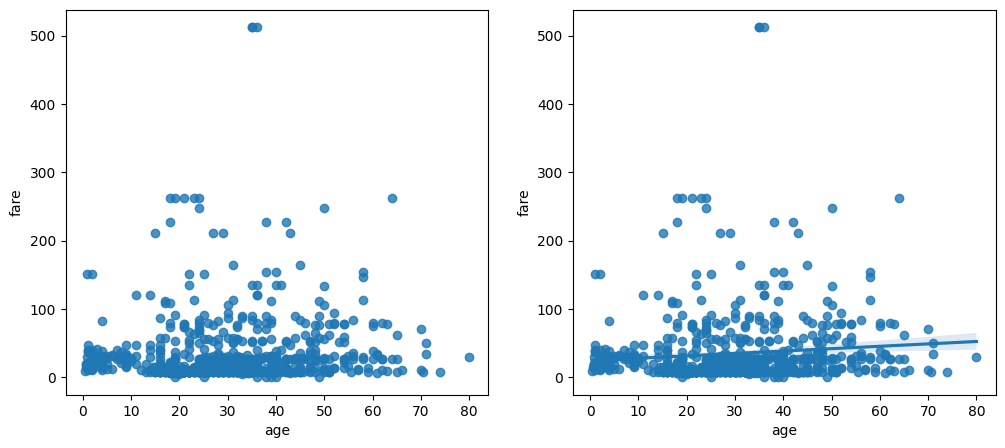

In [3]:
import matplotlib.pyplot as plt

#그래프 객체
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#산점도 그리기
sns.regplot(data=titanic, #데이터 설정
            x='age',  #변수 설정
            y='fare',
            ax = ax1, #axe 객체 설정 = 위치 설정
            fit_reg = False) #산점도만 그리기/ 회귀선 없이

sns.regplot(data=titanic, #데이터 설정
            x='age',  #변수 설정
            y='fare',
            ax = ax2, #axe 객체 설정 = 위치 설정
            fit_reg = True) #산점도랑 회귀선 같이 그리기

plt.show()

###히스토그램, 밀도 함수 그래프

<ipython-input-4-cadca58add9f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'],ax=ax1)


Text(0.5, 1.0, 'fare에 대한 히스토그램')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*args, 

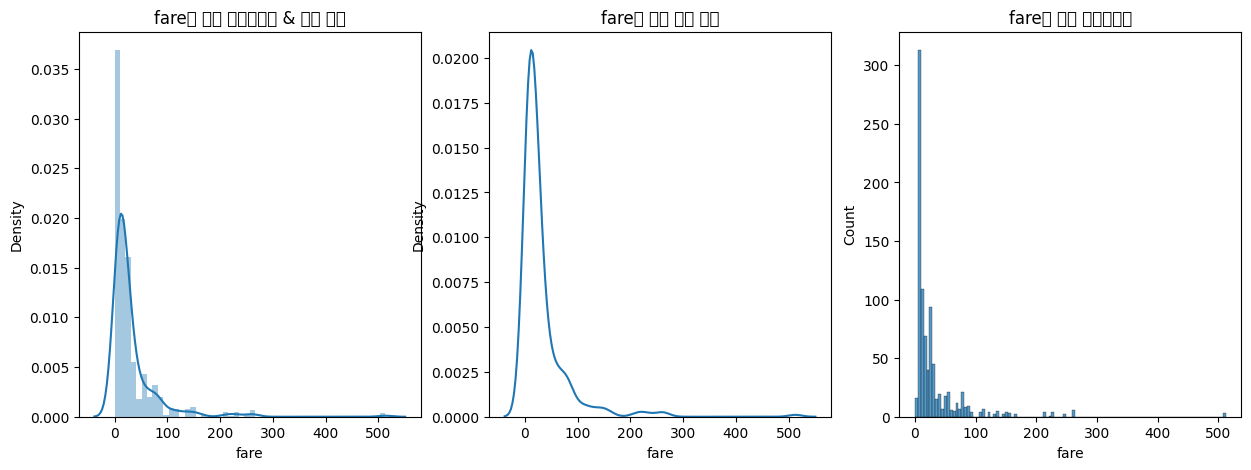

In [4]:
#그래프 객체
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#히스토그램 + 밀도함수 그래프
sns.distplot(titanic['fare'],ax=ax1)
#밀도함수 그래프
sns.kdeplot(titanic['fare'],ax=ax2)
#히스토그램
sns.histplot(titanic['fare'],ax=ax3)

#제목 추가
ax1.set_title('fare에 대한 히스토그램 & 밀도 함수')
ax2.set_title('fare에 대한 밀도 함수')
ax3.set_title('fare에 대한 히스토그램')

###히트맵

In [5]:
#스타일 적용
#darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')

#피봇 테이블 만들기
table = titanic.pivot_table(index='sex', columns = 'class', aggfunc = 'size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='class', ylabel='sex'>

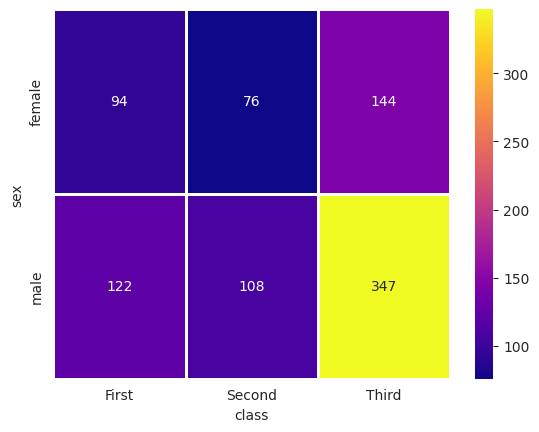

In [6]:
#히트맵 그리기
sns.heatmap(table,
            annot = True, #데이터 값 표시 여부
            fmt = 'd', #숫자 표현 방식 지정 d=정수 표현
            cmap = 'plasma',
            linewidths = 1, #구분선
            cbar = True #컬러바 표시 여부
            )

###범주형 변수 산점도

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


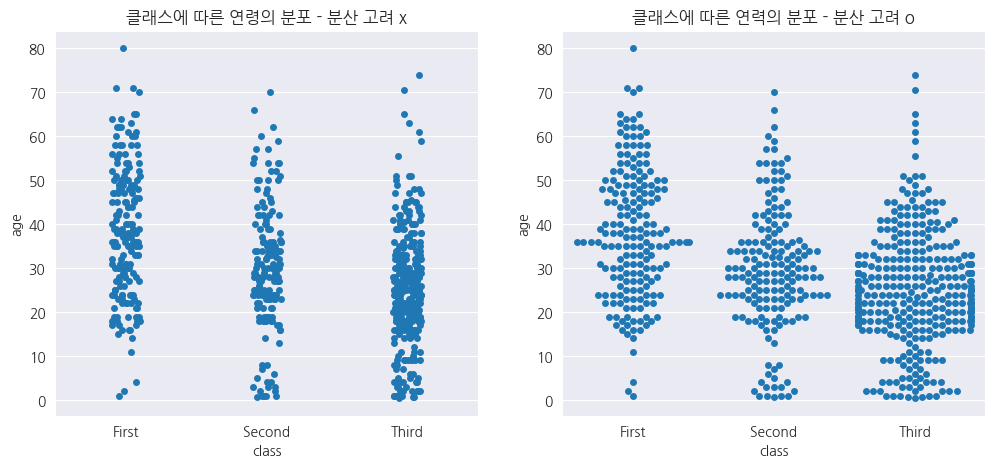

In [8]:
#한글 폰트 설정
plt.rc('font', family='NanumGothic')

#그래프 객체
fig  = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#범주형 변수 산점도
#1) 분산을 고려하지 않은 경우
sns.stripplot(x='class', y='age',data=titanic, ax=ax1)

#2) 분산 고려한 경우
sns.swarmplot(x='class',y='age', data=titanic, ax=ax2)

#제목 추가
ax1.set_title('클래스에 따른 연령의 분포 - 분산 고려 x')
ax2.set_title('클래스에 따른 연력의 분포 - 분산 고려 o')

plt.show()